In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

Imported the necessary libraries
-Pandas - Data Manipulation
-Numpy - Numerical computing
-Matplotlib and Seaborn - For visualizing the data

In [5]:
#df = sns.load_dataset('titanic')
df = pd.read_csv("E:\Python\EDA\Titanic_Data_Analysis\Titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Data loading by Pandas which is csv extension

In [7]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


Display the bottommost values

In [6]:
df.shape

(891, 15)

Dimension of the dataset

In [7]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Column names of the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Getting info about the data which includes the column names, number of non-null values, data types of the column and the memory usage of the dataset

In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Checking for the number of null values in the columns

In [10]:
df.duplicated().sum() #repeated rows

np.int64(107)

Getting the number of duplicated rows

In [10]:
df[df.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


Displaying the duplicated rows

In [12]:
df.drop(['pclass','embarked','alive','deck'], axis = 1, inplace=True)

Data Reduction - Dropping the columns that are not useful

In [13]:
df.shape

(891, 11)

In [11]:
df['age'].fillna(round(df['age'].mean()), inplace=True) # mean coz it has continuous vals

Filling the missing values in the 'age' column

In [15]:
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True) # since multimode we use indexing to get 1st one
#there is lao unimode and bimode

Filling the missing values in the 'embark_town' column

In [16]:
df.isnull().sum()

survived       0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

In [17]:
def categorize(age):
    if age < 14:
        return 'Young'
    elif age < 21:
        return 'Adult'
    elif age < 35:
        return 'middle age'
    else:
        return 'senior'


In [18]:
df['Age_Group']= df['age'].apply(categorize)

Feature Engineering - Adding a new feature 'Age_Group'

In [19]:
df.head()

,survived,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone,Age_Group
0,0,male,22.0,1,0,7.2500,Third,man,True,Southampton,False,middle age
1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,False,senior
2,1,female,26.0,0,0,7.9250,Third,woman,False,Southampton,True,middle age
3,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,False,senior
4,0,male,35.0,0,0,8.0500,Third,man,True,Southampton,True,senior


In [20]:
df['alone'].replace({True:1,False:0}, inplace = True)

In [21]:
df['adult_male'].replace({True:1,False:0}, inplace = True)

Feature Engineering - Replacing the values in the columns 'alone' and 'adult_male'

In [22]:
df.head()

,survived,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone,Age_Group
0,0,male,22.0,1,0,7.2500,Third,man,1,Southampton,0,middle age
1,1,female,38.0,1,0,71.2833,First,woman,0,Cherbourg,0,senior
2,1,female,26.0,0,0,7.9250,Third,woman,0,Southampton,1,middle age
3,1,female,35.0,1,0,53.1000,First,woman,0,Southampton,0,senior
4,0,male,35.0,0,0,8.0500,Third,man,1,Southampton,1,senior


In [23]:
df.describe().T # .T is transpose

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
age,891.0,29.758889,13.002570,0.42,22.0000,30.0000,35.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
adult_male,891.0,0.602694,0.489615,0.00,0.0000,1.0000,1.0,1.0000
alone,891.0,0.602694,0.489615,0.00,0.0000,1.0000,1.0,1.0000


In [24]:
df.describe(include = 'object')

,sex,who,embark_town,Age_Group
count,891,891,891,891
unique,2,3,3,4
top,male,man,Southampton,middle age
freq,577,537,646,476


Getting the Statistical description of the dataset

In [25]:
num_col = df.select_dtypes(include = np.number).columns.tolist()
cat_col = df.select_dtypes(include=['object','category']).columns

print(num_col)
print(cat_col)

['survived', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone']
Index(['sex', 'class', 'who', 'embark_town', 'Age_Group'], dtype='object')


Splitting the columns according to numerical and categorical

survived


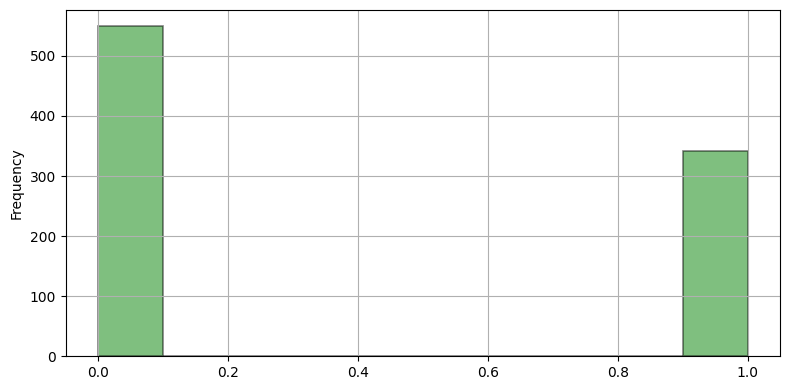

age


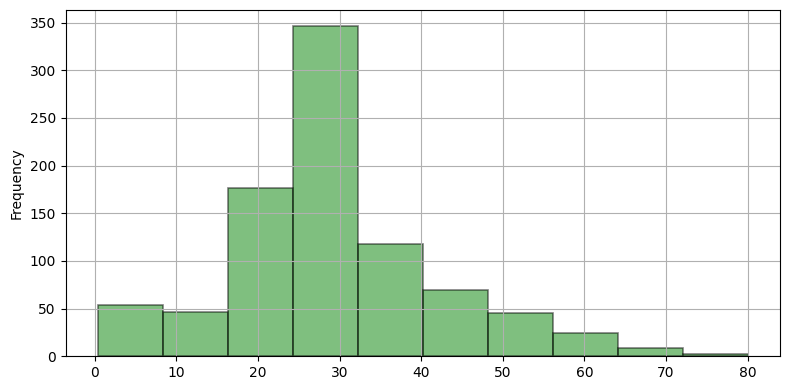

sibsp


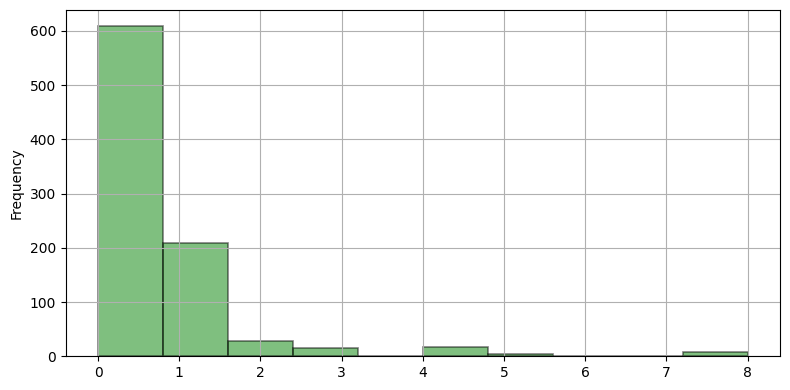

parch


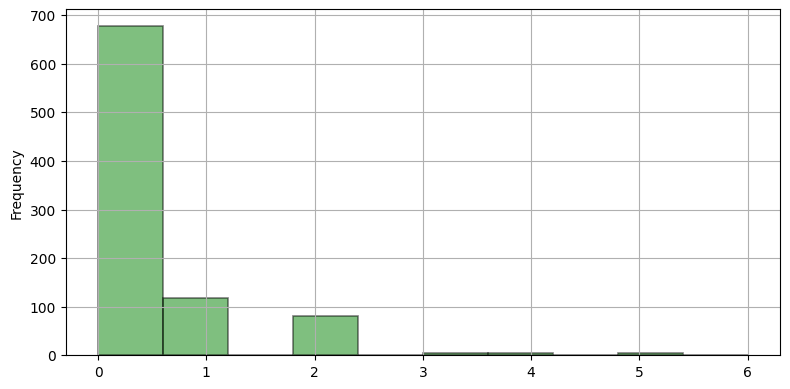

fare


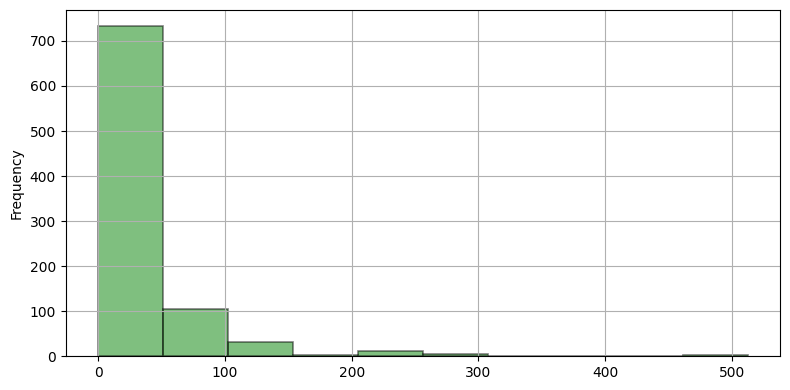

adult_male


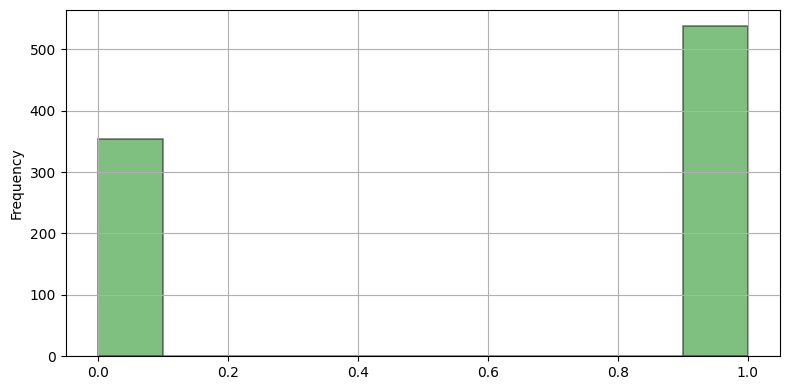

alone


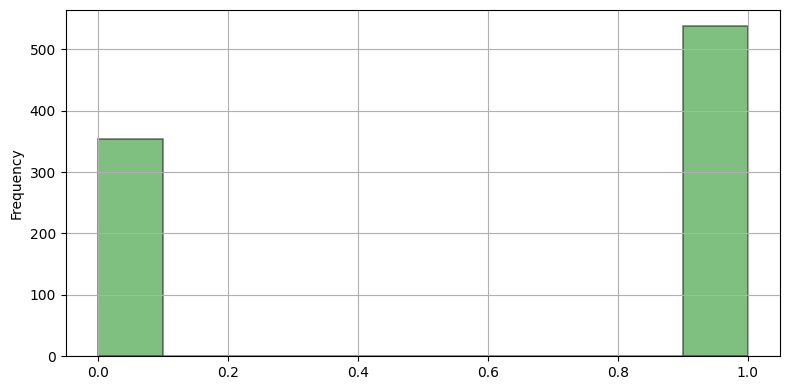

In [26]:
for col in num_col:
    print(col)

    plt.figure(figsize=(8,4))
    plt.subplot(1,1,1)
    df[col].hist(bins = 10, alpha = 0.5, edgecolor = 'black', lw = 1.2, color ='Green')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

We can conclude from the above histograms that :
- Number of survivors is more than the non-survivors
- People onboard were predominantly in the age range of 17-40
- Number of siblings/spouse aboard mostly lies in the range 0-2
- Number of parents/children aboard mostly lies in the range 0-1
- Number of adult males onboard is less
- Number of people traveling alone is more than people with traveling with companions

sex


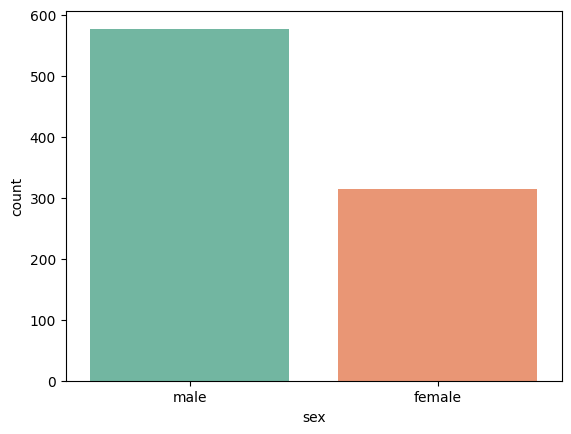

class


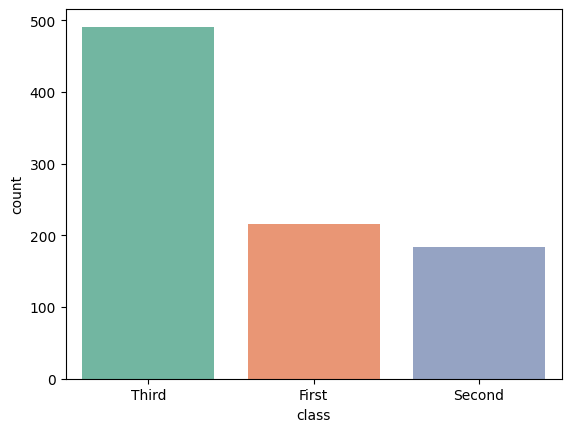

who


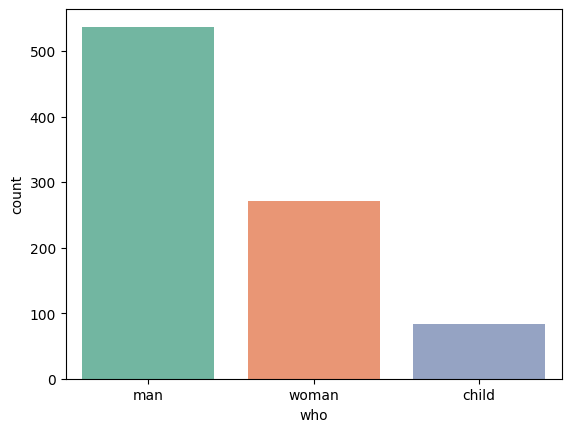

embark_town


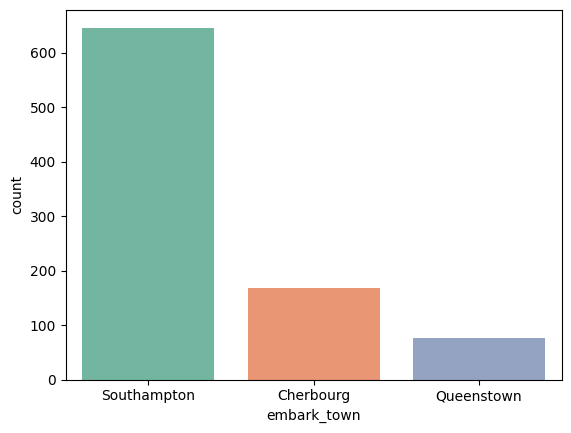

Age_Group


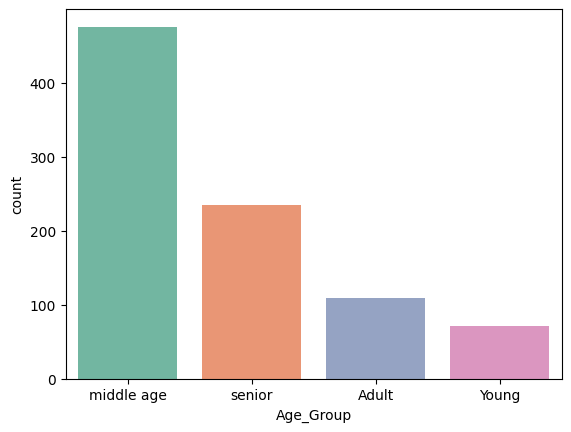

In [27]:
for col in cat_col:
    print(col)

    sns.countplot(x =col,data =df, order = df[col].value_counts().index, palette ='Set2')
    plt.ylabel('count')
    plt.show()

We can conclude from the above countplots that :
- Number of male passengers were more than the female passengers
- Number of people traveling in the third class was the highest and the least number of passengers traveled in the second class
- Among the passengers number of men were the most and the number of children were the least
- Number of passengers who embarked from Southampton was the most and the least was from Queenstown
- Max number of passengers were in the middle age range and the least number of passengers were in the young range

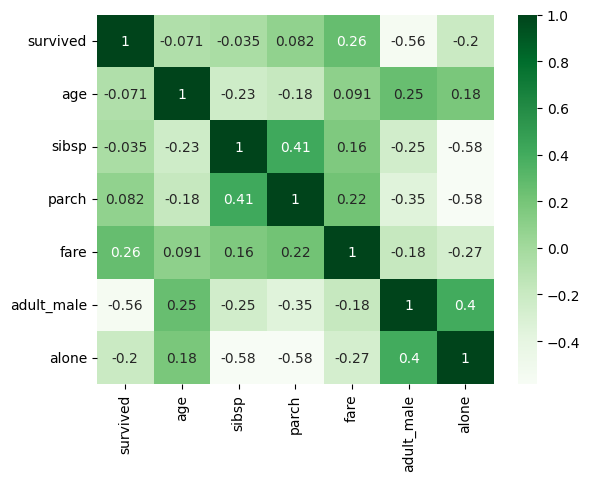

In [28]:
corr = df[num_col].corr()
sns.heatmap(corr, cmap = 'Greens', annot=True)
plt.show()

From the heatmap we can infer that:
- the fare column has a strong correlation with the number of survivors

In [29]:
df.columns

Index(['survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who',
       'adult_male', 'embark_town', 'alone', 'Age_Group'],
      dtype='object')

In [30]:
df.groupby(['survived', 'sex']).agg({'survived':'count'})

survived
survived sex             
0        female        81
         male         468
1        female       233
         male         109

In [31]:
df.groupby(['survived', 'class']).agg({'survived':'count'})

survived
survived class           
0        First         80
         Second        97
         Third        372
1        First        136
         Second        87
         Third        119

In [32]:
df.groupby(['survived', 'embark_town']).agg({'survived':'count'})

survived
survived embark_town          
0        Cherbourg          75
         Queenstown         47
         Southampton       427
1        Cherbourg          93
         Queenstown         30
         Southampton       219

In [33]:
df.groupby(['survived', 'adult_male']).agg({'survived':'count'})

survived
survived adult_male          
0        0                100
         1                449
1        0                254
         1                 88

In [34]:
df.groupby(['survived', 'alone']).agg({'survived':'count'})

survived
survived alone          
0        0           175
         1           374
1        0           179
         1           163

In [35]:
df.groupby(['survived', 'Age_Group']).agg({'survived':'count'})

survived
survived Age_Group           
0        Adult             69
         Young             29
         middle age       310
         senior           141
1        Adult             40
         Young             42
         middle age       166
         senior            94

Grouping the columns to see how each column(feature) is relating to the survival rate

Text(0.5, 1.0, 'Survived')

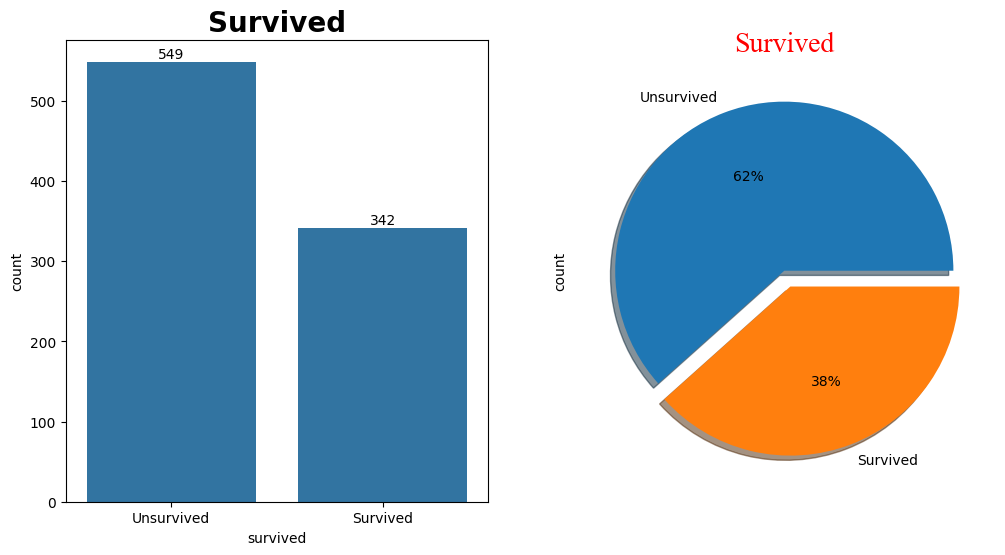

In [7]:
plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x = 'survived', data = df)
ax.set_xticklabels({'Unsurvived','Survived'})
ax.bar_label(ax.containers[0])
plt.title("Survived", fontsize = 20, fontweight = 'bold')

ax = plt.subplot(1,2,2)
ax = df['survived'].value_counts().plot.pie(labels = ['Unsurvived','Survived'], explode = [0,0.1], autopct = '%1.f%%', shadow = True)
ax.set_title(label ='Survived', color = 'Red', font = 'Times New Roman', fontsize = 20 )

From the above visualization we can infer that the number of non-survivors is more than the non-survivors

Text(0.5, 1.0, 'Gender')

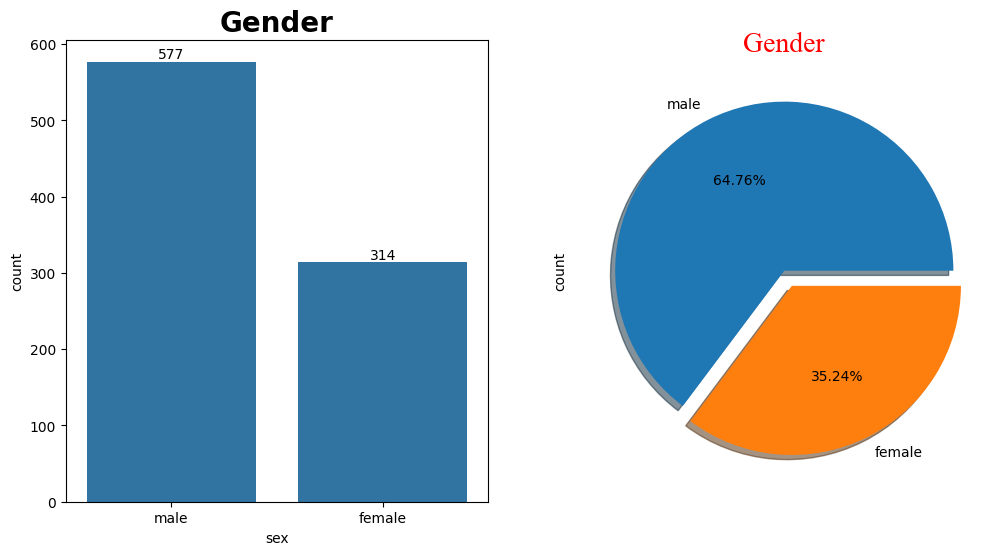

In [11]:
plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x = 'sex', data = df)
ax.bar_label(ax.containers[0])
plt.title("Gender", fontsize = 20, fontweight = 'bold')

ax = plt.subplot(1,2,2)
ax = df['sex'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.2f%%', shadow = True)
ax.set_title(label ='Gender', color = 'Red', font = 'Times New Roman', fontsize = 20 )

From the above visualization we can infer that the number of males were more than and females onboard

Text(0.5, 1.0, 'Gender')

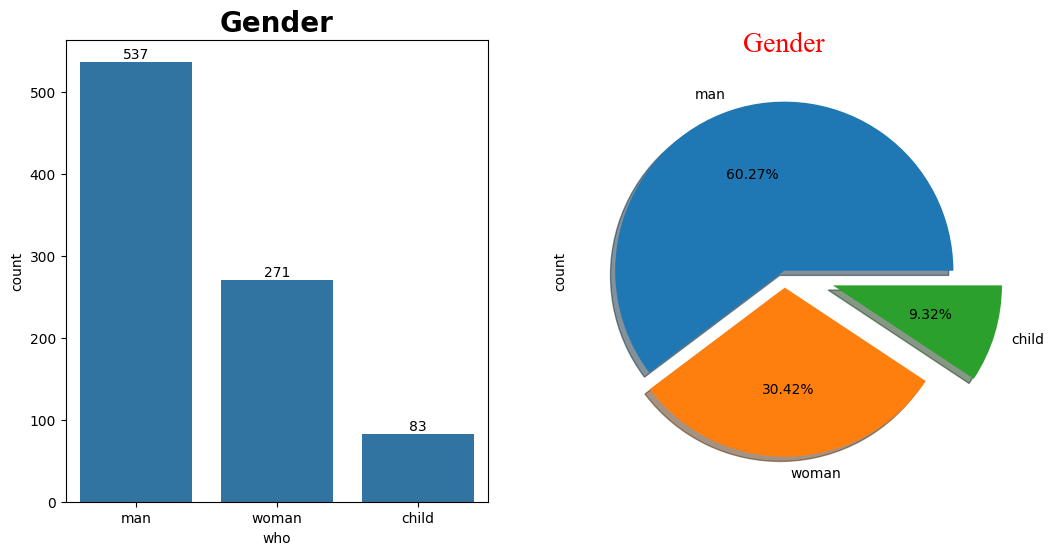

In [16]:
plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x = 'who', data = df)
ax.bar_label(ax.containers[0])
plt.title("Gender", fontsize = 20, fontweight = 'bold')

ax = plt.subplot(1,2,2)
ax = df['who'].value_counts().plot.pie(explode = [0,0.1,0.3], autopct = '%1.2f%%', shadow = True)
ax.set_title(label ='Gender', color = 'Red', font = 'Times New Roman', fontsize = 20 )

From the above visualization we can infer that max number of men were onboard and the number of children was the least

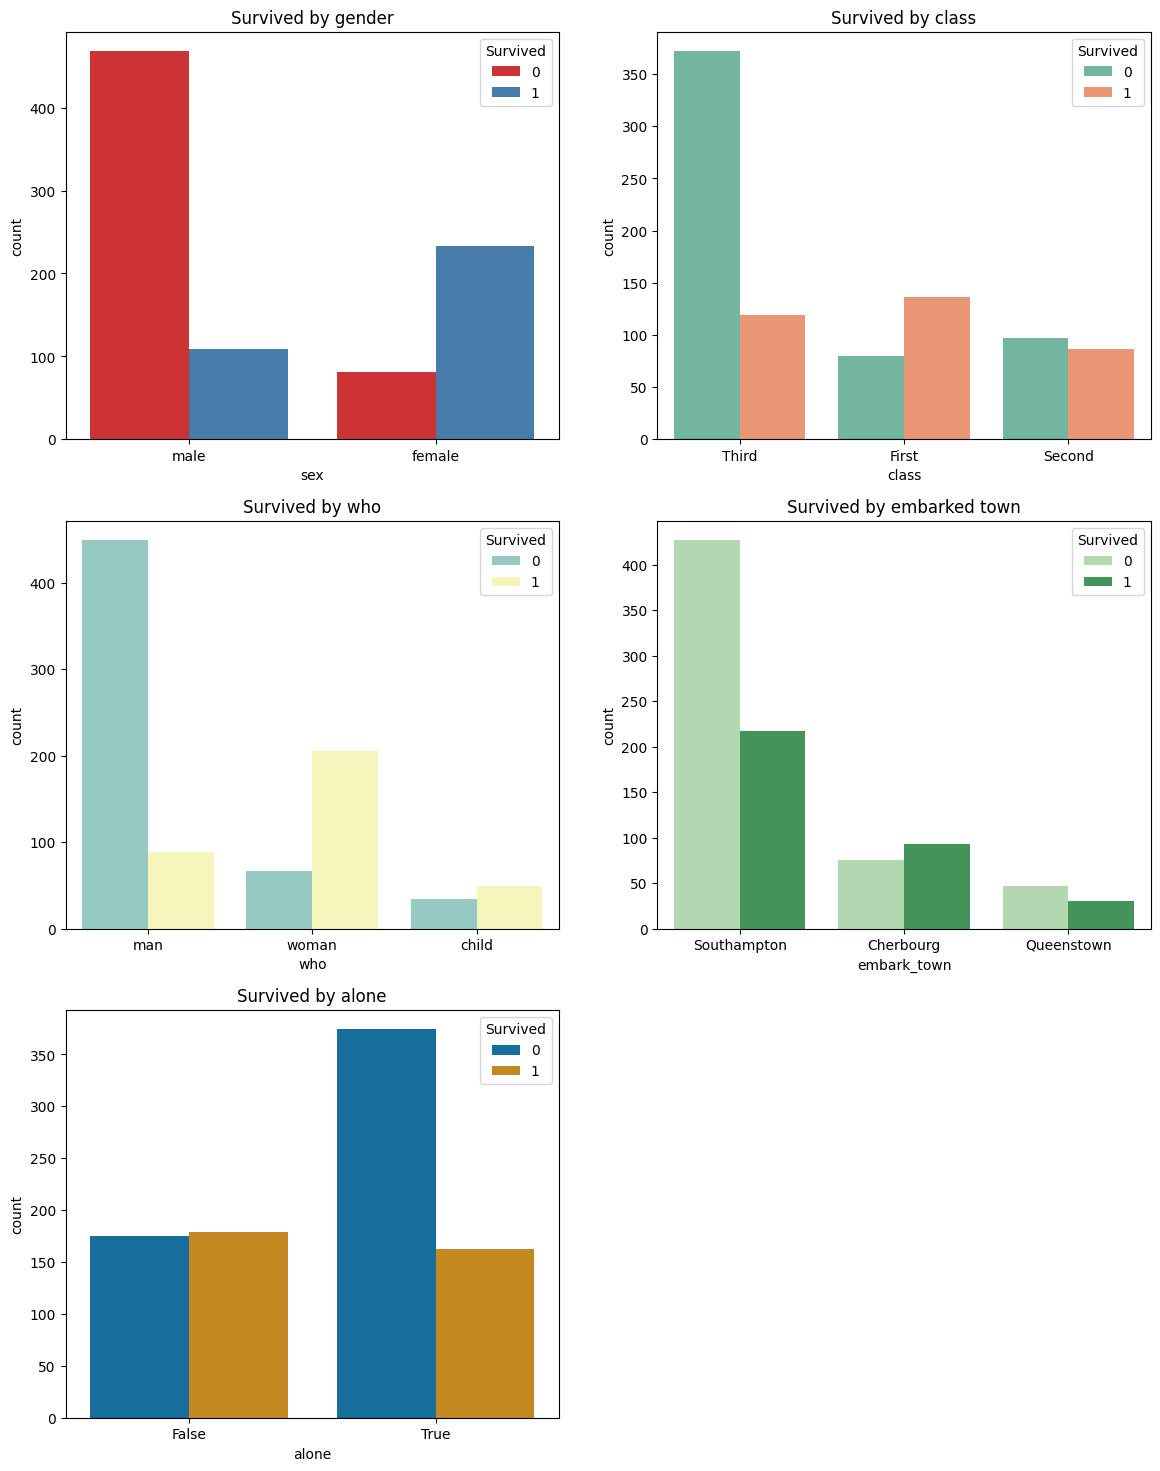

In [9]:
plt.figure(figsize=(14,18))

plt.subplot(3,2,1)
sns.countplot(x= 'sex',hue = 'survived', data = df, palette = 'Set1') # hue - further break down the counts by another categorical variable
plt.legend(title= 'Survived', loc = 'upper right')
plt.title("Survived by gender")

plt.subplot(3,2,2)
sns.countplot(x= 'class',hue = 'survived', data = df, palette = 'Set2')
plt.legend(title= 'Survived', loc = 1)
plt.title("Survived by class")

plt.subplot(3,2,3)
sns.countplot(x= 'who',hue = 'survived', data = df, palette = 'Set3')
plt.legend(title= 'Survived', loc = 1)
plt.title("Survived by who")

plt.subplot(3,2,4)
sns.countplot(x= 'embark_town',hue = 'survived', data = df, palette = 'Greens')
plt.legend(title= 'Survived', loc = 1)
plt.title("Survived by embarked town")

plt.subplot(3,2,5)
sns.countplot(x= 'alone',hue = 'survived', data = df, palette = 'colorblind')
plt.legend(title= 'Survived', loc = 1)
plt.title("Survived by alone")

plt.show()

From the above visualizations we can infer that:
- Number of female survivors is more than male
- Number of survivors is the most in first class and number of non-survivors is most in third class
- Max number of non - survivors are men
- Max number of non-survivors are from Southampton
- 

In [23]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

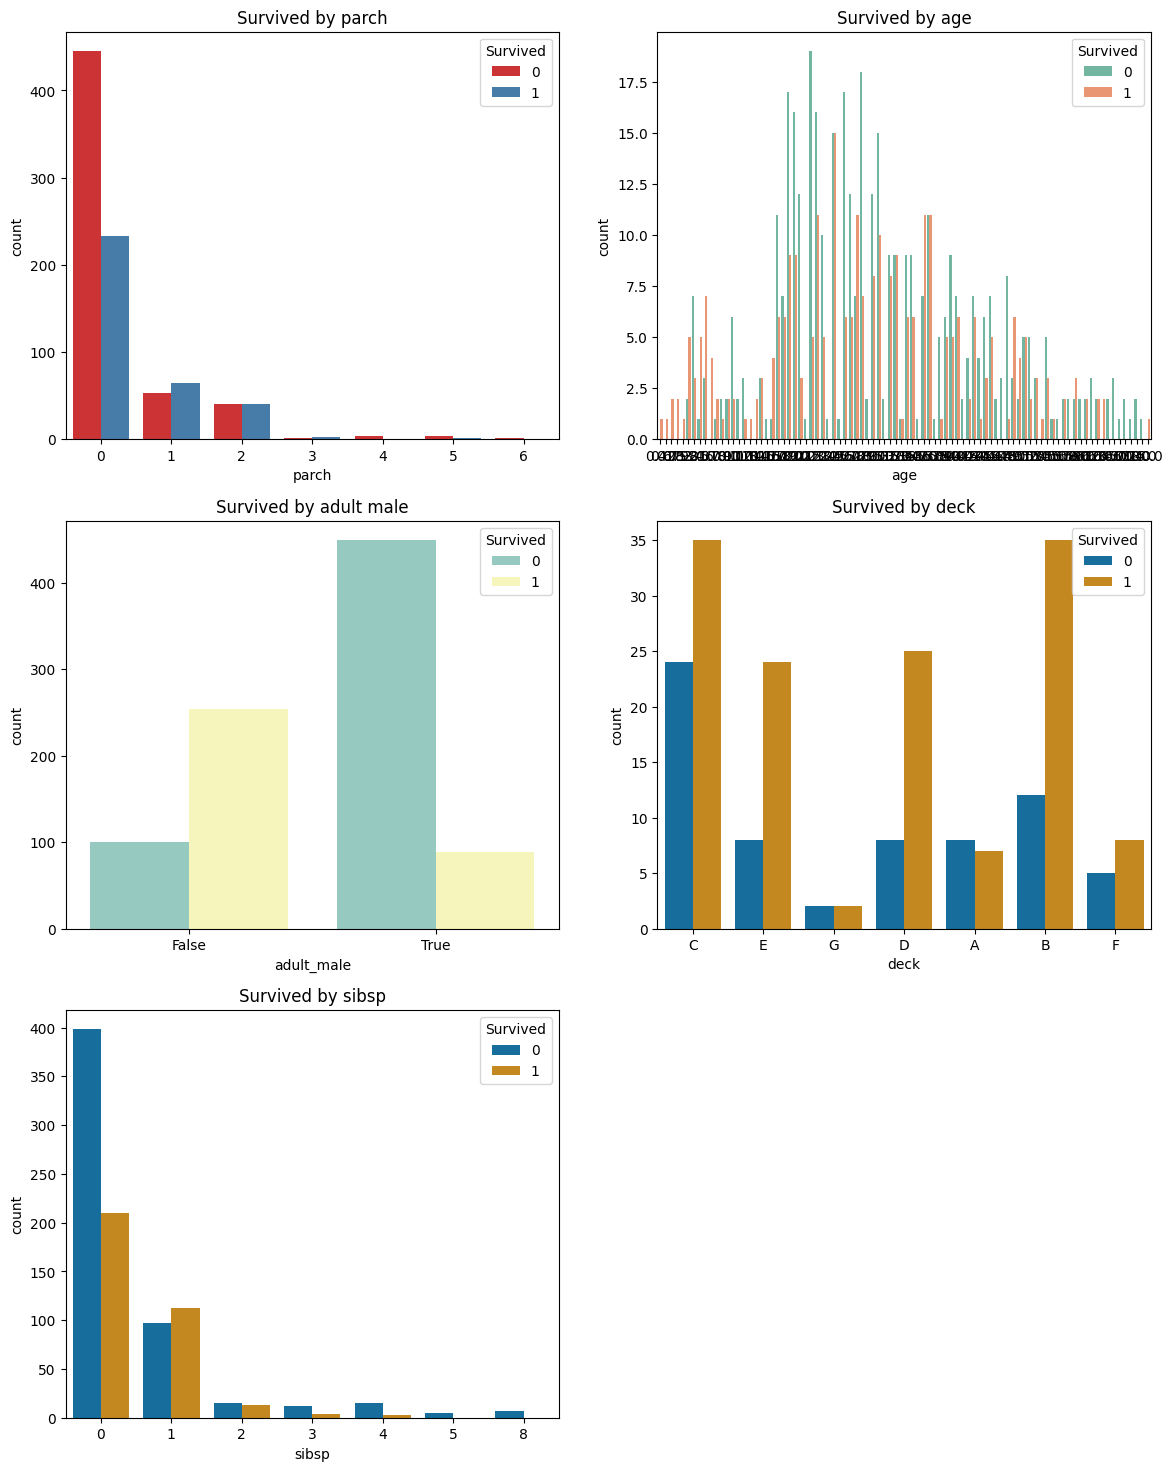

In [25]:
plt.figure(figsize=(14,18))

plt.subplot(3,2,1)
sns.countplot(x= 'parch',hue = 'survived', data = df, palette = 'Set1')
plt.legend(title= 'Survived', loc = 'upper right')
plt.title("Survived by parch")

plt.subplot(3,2,2)
sns.countplot(x= 'age',hue = 'survived', data = df, palette = 'Set2')
plt.legend(title= 'Survived', loc = 1)
plt.title("Survived by age")

plt.subplot(3,2,3)
sns.countplot(x= 'adult_male',hue = 'survived', data = df, palette = 'Set3')
plt.legend(title= 'Survived', loc = 1)
plt.title("Survived by adult male")

plt.subplot(3,2,4)
sns.countplot(x= 'deck',hue = 'survived', data = df, palette = 'colorblind')
plt.legend(title= 'Survived', loc = 1)
plt.title("Survived by deck")

plt.subplot(3,2,5)
sns.countplot(x= 'sibsp',hue = 'survived', data = df, palette = 'colorblind')
plt.legend(title= 'Survived', loc = 1)
plt.title("Survived by sibsp")

plt.show()

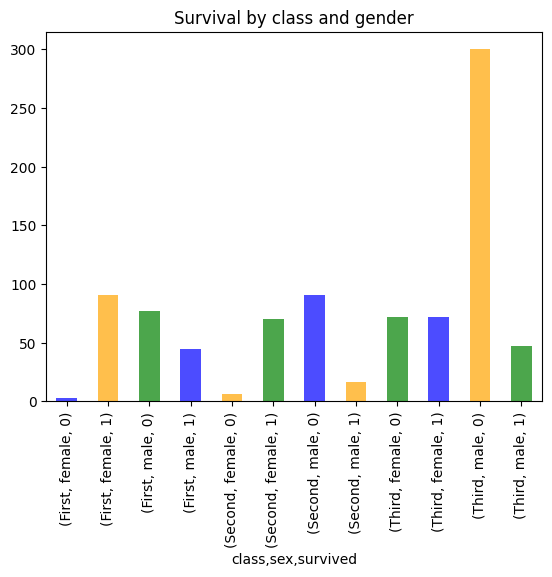

In [19]:
survival_rate_by_class_gender = df.groupby(['class', 'sex', 'survived'])['survived'].count()
survival_rate_by_class_gender.plot(kind='bar',color=['blue','orange','green'], alpha =0.7)
plt.title('Survival by class and gender')
plt.xticks(rotation=90)
plt.show()

In [20]:
cross_tab = pd.crosstab(index =[df['survived'],df['sex']],columns=df['class']) #1st factor to compare and then 2nd and then the factor we want as our col
cross_tab

class            First  Second  Third
survived sex                         
0        female      3       6     72
         male       77      91    300
1        female     91      70     72
         male       45      17     47

<Axes: title={'center': 'Survival by passenger class'}, xlabel='class'>

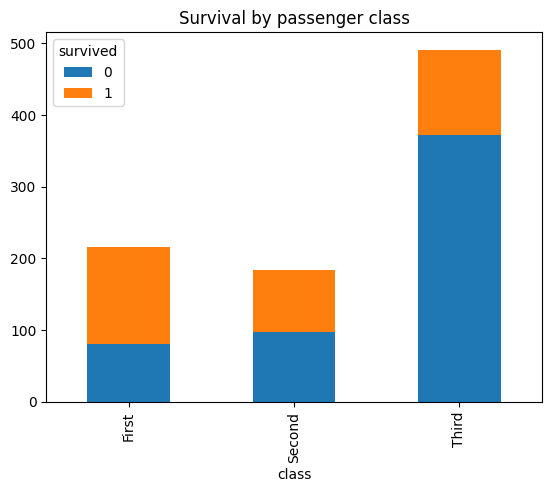

In [21]:
survival_by_class = pd.crosstab(index=df['class'], columns=df['survived'])
survival_by_class.plot(kind='bar',stacked=True,title='Survival by passenger class')

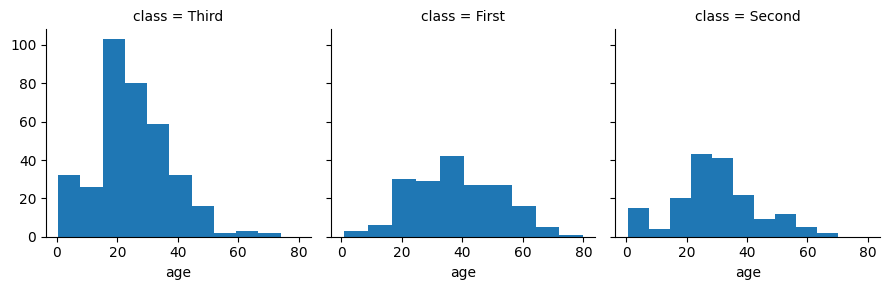

In [22]:
cla = sns.FacetGrid(data=df,col='class')
cla=cla.map(plt.hist,'age')

In [ ]:
#observation and conclusion